In [ ]:
!unzip Mushroom.zip

In [ ]:
import os
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np
from time import time

In [ ]:
os.chdir('/content/Mushroom')
os.listdir()

['.DS_Store', 'Test', 'Train', 'resize.py']

In [ ]:
train_dir = pathlib.Path('Train')
test_dir = pathlib.Path('Test')

In [ ]:
batch_size = 64
img_height = 224
img_width = 224
num_classes = 10
epochs = 20
base_learning_rate = 0.01
ft_learning_rate = 0.001

In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 900 files belonging to 10 classes.
Using 720 files for training.


In [ ]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 900 files belonging to 10 classes.
Using 180 files for validation.


In [ ]:
test_ds = keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 10 classes.


In [ ]:
class_names = train_ds.class_names

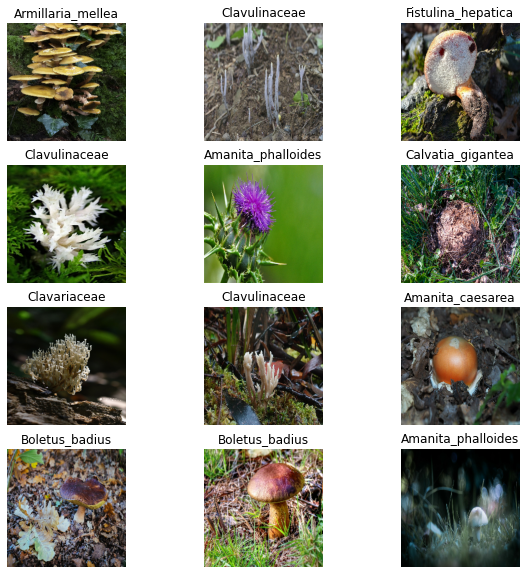

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# MobileNetV2


In [ ]:
base_model = keras.applications.MobileNetV2(input_shape=(img_height,img_width,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
preprocess_input = keras.applications.mobilenet_v2.preprocess_input
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ],name="Data_Augmentation"
)
global_average_layer = keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(num_classes,name="Prediction_Layer")

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
start = time()
model.evaluate(val_ds)
end = time()
print("Time",end-start)

3/3 [==============================] - 32s 444ms/step - loss: 2.5546 - accuracy: 0.0897
Time 32.23066520690918


In [ ]:
start = time()
hist1 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)
end = time()
print("Time",end-start)

Epoch 1/20
12/12 [==============================] - 13s 491ms/step - loss: 2.4062 - accuracy: 0.1569 - val_loss: 2.1276 - val_accuracy: 0.2667
Epoch 2/20
12/12 [==============================] - 9s 421ms/step - loss: 2.0462 - accuracy: 0.2958 - val_loss: 1.8198 - val_accuracy: 0.4222
Epoch 3/20
12/12 [==============================] - 9s 419ms/step - loss: 1.7452 - accuracy: 0.4181 - val_loss: 1.6152 - val_accuracy: 0.4722
Epoch 4/20
12/12 [==============================] - 9s 418ms/step - loss: 1.5823 - accuracy: 0.4833 - val_loss: 1.4461 - val_accuracy: 0.5667
Epoch 5/20
12/12 [==============================] - 9s 419ms/step - loss: 1.4063 - accuracy: 0.5806 - val_loss: 1.3347 - val_accuracy: 0.5889
Epoch 6/20
12/12 [==============================] - 9s 429ms/step - loss: 1.3037 - accuracy: 0.5931 - val_loss: 1.2340 - val_accuracy: 0.6333
Epoch 7/20
12/12 [==============================] - 9s 421ms/step - loss: 1.2216 - accuracy: 0.6319 - val_loss: 1.1484 - val_accuracy: 0.6500
Epoch

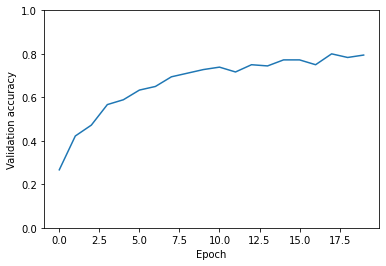

In [ ]:
plt.ylim(0,1)
plt.xlabel("Epoch")
plt.ylabel("Validation accuracy")
plt.plot(hist1.history['val_accuracy'])

In [ ]:
os.chdir("/content/Mushroom")
test_ds = keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

start=time()
model.evaluate(test_ds)
end=time()
print("Time",end-start)

Found 100 files belonging to 10 classes.
2/2 [==============================] - 2s 643ms/step - loss: 0.8308 - accuracy: 0.7400
Time 1.6061103343963623


In [ ]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.SGD(learning_rate=ft_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
hist2 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)


Epoch 1/20
12/12 [==============================] - 22s 1s/step - loss: 0.9199 - accuracy: 0.6827 - val_loss: 0.7216 - val_accuracy: 0.8056
Epoch 2/20
12/12 [==============================] - 16s 969ms/step - loss: 0.8380 - accuracy: 0.7296 - val_loss: 0.9432 - val_accuracy: 0.6944
Epoch 3/20
12/12 [==============================] - 16s 975ms/step - loss: 0.8217 - accuracy: 0.7330 - val_loss: 0.6989 - val_accuracy: 0.7667
Epoch 4/20
12/12 [==============================] - 16s 982ms/step - loss: 0.6898 - accuracy: 0.7521 - val_loss: 0.8700 - val_accuracy: 0.7056
Epoch 5/20
12/12 [==============================] - 16s 976ms/step - loss: 0.6564 - accuracy: 0.7887 - val_loss: 0.9607 - val_accuracy: 0.6833
Epoch 6/20
12/12 [==============================] - 16s 969ms/step - loss: 0.8918 - accuracy: 0.6792 - val_loss: 0.7596 - val_accuracy: 0.7556
Epoch 7/20
12/12 [==============================] - 16s 983ms/step - loss: 0.8126 - accuracy: 0.7262 - val_loss: 0.6871 - val_accuracy: 0.7556
Ep

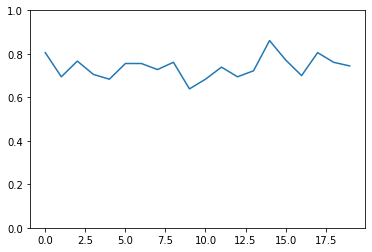

In [ ]:
plt.ylim(0,1)
plt.plot(hist2.history['val_accuracy'])

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 1s 93ms/step - loss: 0.9109 - accuracy: 0.7500


[0.9108723402023315, 0.75]

In [ ]:
#from tensorflow.keras.utils import plot_model
#plot_model(model,show_shapes=True)

In [ ]:
#model.summary()

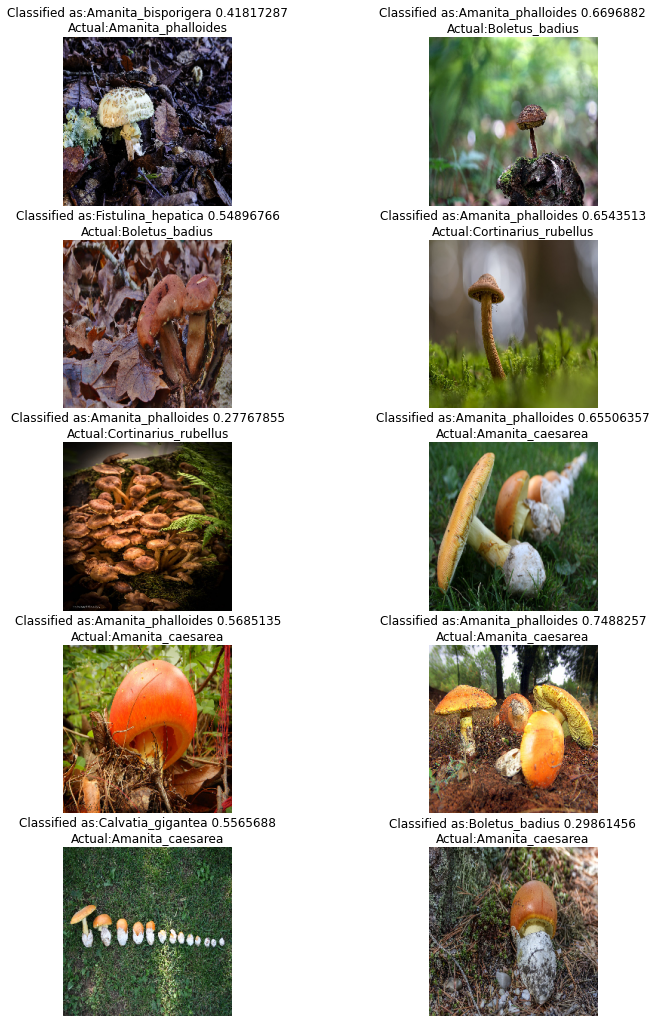

In [ ]:
plt.figure(figsize=(12, 18))
k = 0
os.chdir("/content/Mushroom/Test")
for mush in os.listdir():
  if mush==".DS_Store":
    continue

  os.chdir("/content/Mushroom/Test/"+mush)
  for i in os.listdir():
    if i == ".DS_Store":
      continue
    path = os.getcwd()+"/"+i
    try:
      img = keras.preprocessing.image.load_img(
        path, target_size=(img_height, img_width)
      )
      img_array = keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) # Create a batch

      predictions = model.predict(img_array)
      score = tf.nn.softmax(predictions[0])
      if mush != class_names[np.argmax(score)]:
        ax = plt.subplot(5, 2, k + 1)
        k+=1
        plt.axis("off")
        plt.imshow(img)
        title = "Classified as:"+class_names[np.argmax(score)] +" "+ str(np.max(score)) + "\nActual:" + mush
        plt.title(title,fontsize=12)
        if mush in ['Amanita_phalloides','Cortinarius_rubellus','Amanita_bisporigera']:
          if class_names[np.argmax(score)] not in ['Amanita_phalloides','Cortinarius_rubellus','Amanita_bisporigera']:
            plt.title(title,fontsize=12,color='red')
        
          


    except:
      pass

# VGG16


In [ ]:
base_model = keras.applications.VGG16(input_shape=(img_height,img_width,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
preprocess_input = keras.applications.vgg16.preprocess_input
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ],name="Data_Augmentation"
)
global_average_layer = keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(num_classes,name="Prediction_Layer")

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
os.chdir('/content/Mushroom')

In [ ]:
model.evaluate(val_ds)

3/3 [==============================] - 32s 7s/step - loss: 11.4815 - accuracy: 0.1244


[11.254059791564941, 0.12777778506278992]

In [ ]:
start = time()
hist1 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)
end = time()
print("Time",end-start)

Epoch 1/20
12/12 [==============================] - 20s 1s/step - loss: 4.9919 - accuracy: 0.2528 - val_loss: 3.5760 - val_accuracy: 0.4111
Epoch 2/20
12/12 [==============================] - 13s 773ms/step - loss: 2.9801 - accuracy: 0.4403 - val_loss: 2.7617 - val_accuracy: 0.5278
Epoch 3/20
12/12 [==============================] - 13s 776ms/step - loss: 2.0509 - accuracy: 0.5292 - val_loss: 2.4690 - val_accuracy: 0.5667
Epoch 4/20
12/12 [==============================] - 13s 772ms/step - loss: 1.8183 - accuracy: 0.5806 - val_loss: 1.7586 - val_accuracy: 0.6833
Epoch 5/20
12/12 [==============================] - 13s 777ms/step - loss: 1.5109 - accuracy: 0.6361 - val_loss: 2.6983 - val_accuracy: 0.5167
Epoch 6/20
12/12 [==============================] - 13s 774ms/step - loss: 1.4683 - accuracy: 0.6194 - val_loss: 1.7986 - val_accuracy: 0.6667
Epoch 7/20
12/12 [==============================] - 13s 771ms/step - loss: 1.2907 - accuracy: 0.6708 - val_loss: 1.9788 - val_accuracy: 0.6667
Ep

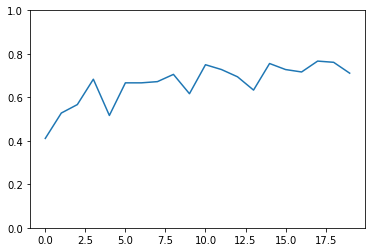

In [ ]:
plt.ylim(0,1)
plt.plot(hist1.history['val_accuracy'])

In [ ]:
os.chdir("/content/Mushroom")
start = time()
model.evaluate(test_ds)
end = time()
print("TIME",end-start)

2/2 [==============================] - 13s 11s/step - loss: 2.3123 - accuracy: 0.6800
TIME 12.593318700790405


In [ ]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.SGD(learning_rate=ft_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
hist2 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)


Epoch 1/20
12/12 [==============================] - 37s 2s/step - loss: 0.7540 - accuracy: 0.7765 - val_loss: 1.0726 - val_accuracy: 0.7722
Epoch 2/20
12/12 [==============================] - 26s 2s/step - loss: 0.5593 - accuracy: 0.8053 - val_loss: 1.0988 - val_accuracy: 0.7778
Epoch 3/20
12/12 [==============================] - 26s 2s/step - loss: 0.4556 - accuracy: 0.8437 - val_loss: 1.0685 - val_accuracy: 0.7500
Epoch 4/20
12/12 [==============================] - 26s 2s/step - loss: 0.3808 - accuracy: 0.8648 - val_loss: 0.9455 - val_accuracy: 0.8111
Epoch 5/20
12/12 [==============================] - 26s 2s/step - loss: 0.3450 - accuracy: 0.8702 - val_loss: 1.0596 - val_accuracy: 0.7778
Epoch 6/20
12/12 [==============================] - 26s 2s/step - loss: 0.3499 - accuracy: 0.8785 - val_loss: 1.2407 - val_accuracy: 0.7500
Epoch 7/20
12/12 [==============================] - 26s 2s/step - loss: 0.3935 - accuracy: 0.8833 - val_loss: 0.9290 - val_accuracy: 0.8056
Epoch 8/20
12/12 [==

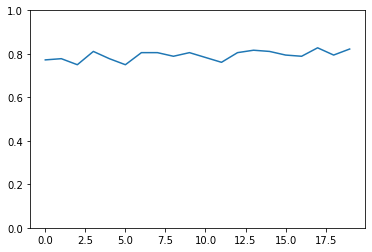

In [ ]:
plt.ylim(0,1)
plt.plot(hist2.history['val_accuracy'])

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 2s 319ms/step - loss: 1.6116 - accuracy: 0.7300


[1.611566424369812, 0.7300000190734863]

# Resnet50

In [ ]:
base_model = keras.applications.ResNet50(input_shape=(img_height,img_width,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ],name="Data_Augmentation"
)
global_average_layer = keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(num_classes,name="Prediction_Layer")

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
start = time()
hist1 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)
end = time()
print("Time",end-start)

Epoch 1/20
12/12 [==============================] - 22s 1s/step - loss: 2.6111 - accuracy: 0.1710 - val_loss: 1.7686 - val_accuracy: 0.3556
Epoch 2/20
12/12 [==============================] - 13s 718ms/step - loss: 1.7404 - accuracy: 0.4165 - val_loss: 1.3583 - val_accuracy: 0.5222
Epoch 3/20
12/12 [==============================] - 13s 716ms/step - loss: 1.3255 - accuracy: 0.5388 - val_loss: 1.0319 - val_accuracy: 0.6500
Epoch 4/20
12/12 [==============================] - 13s 715ms/step - loss: 1.1191 - accuracy: 0.6429 - val_loss: 1.0434 - val_accuracy: 0.6389
Epoch 5/20
12/12 [==============================] - 13s 718ms/step - loss: 1.0311 - accuracy: 0.6522 - val_loss: 0.8599 - val_accuracy: 0.7389
Epoch 6/20
12/12 [==============================] - 13s 720ms/step - loss: 0.8301 - accuracy: 0.7237 - val_loss: 0.7921 - val_accuracy: 0.7389
Epoch 7/20
12/12 [==============================] - 13s 716ms/step - loss: 0.7886 - accuracy: 0.7388 - val_loss: 0.7435 - val_accuracy: 0.7611
Ep

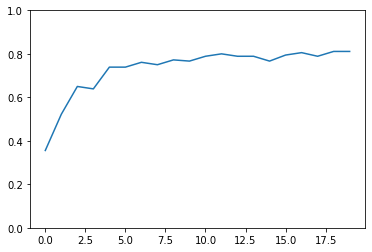

In [ ]:
plt.ylim(0,1)
plt.plot(hist1.history['val_accuracy'])

In [ ]:
os.chdir("/content/Mushroom")
start = time()
model.evaluate(test_ds)
end = time()
print("TIME",end-start)

2/2 [==============================] - 3s 1s/step - loss: 0.8807 - accuracy: 0.7200
TIME 2.561142921447754


Epoch 1/20
12/12 [==============================] - 31s 2s/step - loss: 0.4056 - accuracy: 0.8833 - val_loss: 0.6319 - val_accuracy: 0.7833
Epoch 2/20
12/12 [==============================] - 23s 2s/step - loss: 0.3974 - accuracy: 0.8946 - val_loss: 0.5782 - val_accuracy: 0.8222
Epoch 3/20
12/12 [==============================] - 23s 2s/step - loss: 0.3582 - accuracy: 0.8893 - val_loss: 0.5807 - val_accuracy: 0.8111
Epoch 4/20
12/12 [==============================] - 23s 2s/step - loss: 0.3691 - accuracy: 0.8693 - val_loss: 0.5604 - val_accuracy: 0.8278
Epoch 5/20
12/12 [==============================] - 23s 2s/step - loss: 0.3338 - accuracy: 0.8930 - val_loss: 0.5701 - val_accuracy: 0.8333
Epoch 6/20
12/12 [==============================] - 23s 2s/step - loss: 0.3063 - accuracy: 0.8995 - val_loss: 0.5709 - val_accuracy: 0.8333
Epoch 7/20
12/12 [==============================] - 23s 2s/step - loss: 0.3143 - accuracy: 0.9013 - val_loss: 0.5856 - val_accuracy: 0.8278
Epoch 8/20
12/12 [==

[0.9334062337875366, 0.7599999904632568]

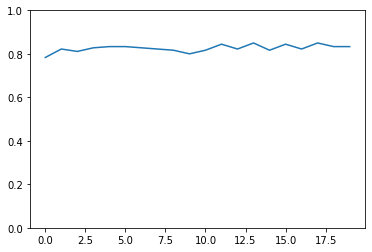

In [ ]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.SGD(learning_rate=ft_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
hist2 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)

plt.ylim(0,1)
plt.plot(hist2.history['val_accuracy'])

model.evaluate(test_ds)


# Xception

In [ ]:
base_model = keras.applications.Xception(input_shape=(img_height,img_width,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

83689472/83683744 [==============================] - 3s 0us/step


In [ ]:
preprocess_input = keras.applications.xception.preprocess_input
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ],name="Data_Augmentation"
)
global_average_layer = keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(num_classes,name="Prediction_Layer")

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
start = time()
hist1 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)
end = time()
print("Time",end-start)

Epoch 1/20
12/12 [==============================] - 24s 1s/step - loss: 2.3553 - accuracy: 0.1030 - val_loss: 2.1243 - val_accuracy: 0.2167
Epoch 2/20
12/12 [==============================] - 15s 903ms/step - loss: 2.1101 - accuracy: 0.2562 - val_loss: 1.9318 - val_accuracy: 0.3722
Epoch 3/20
12/12 [==============================] - 15s 905ms/step - loss: 1.9490 - accuracy: 0.3448 - val_loss: 1.7749 - val_accuracy: 0.5111
Epoch 4/20
12/12 [==============================] - 15s 907ms/step - loss: 1.7901 - accuracy: 0.4338 - val_loss: 1.6490 - val_accuracy: 0.5611
Epoch 5/20
12/12 [==============================] - 15s 908ms/step - loss: 1.6599 - accuracy: 0.5034 - val_loss: 1.5416 - val_accuracy: 0.5889
Epoch 6/20
12/12 [==============================] - 15s 914ms/step - loss: 1.5501 - accuracy: 0.5605 - val_loss: 1.4526 - val_accuracy: 0.5889
Epoch 7/20
12/12 [==============================] - 15s 914ms/step - loss: 1.4687 - accuracy: 0.5591 - val_loss: 1.3722 - val_accuracy: 0.6000
Ep

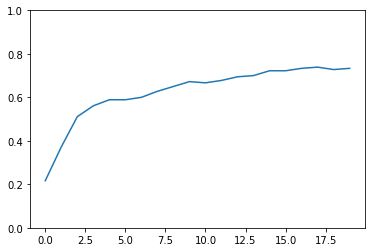

In [ ]:
plt.ylim(0,1)
plt.plot(hist1.history['val_accuracy'])

In [ ]:
os.chdir("/content/Mushroom")
start = time()
model.evaluate(test_ds)
end = time()
print("TIME",end-start)

2/2 [==============================] - 3s 2s/step - loss: 1.0807 - accuracy: 0.6300
TIME 3.066932439804077


Epoch 1/20
12/12 [==============================] - 46s 3s/step - loss: 1.0051 - accuracy: 0.7442 - val_loss: 0.9204 - val_accuracy: 0.7167
Epoch 2/20
12/12 [==============================] - 37s 3s/step - loss: 0.9247 - accuracy: 0.7051 - val_loss: 0.8716 - val_accuracy: 0.7222
Epoch 3/20
12/12 [==============================] - 37s 3s/step - loss: 0.8789 - accuracy: 0.7497 - val_loss: 0.8353 - val_accuracy: 0.7333
Epoch 4/20
12/12 [==============================] - 37s 3s/step - loss: 0.8192 - accuracy: 0.7260 - val_loss: 0.7999 - val_accuracy: 0.7389
Epoch 5/20
12/12 [==============================] - 37s 3s/step - loss: 0.8403 - accuracy: 0.7417 - val_loss: 0.7713 - val_accuracy: 0.7389
Epoch 6/20
12/12 [==============================] - 37s 3s/step - loss: 0.7788 - accuracy: 0.7560 - val_loss: 0.7540 - val_accuracy: 0.7389
Epoch 7/20
12/12 [==============================] - 37s 3s/step - loss: 0.7761 - accuracy: 0.7594 - val_loss: 0.7352 - val_accuracy: 0.7556
Epoch 8/20
12/12 [==

[0.773326575756073, 0.75]

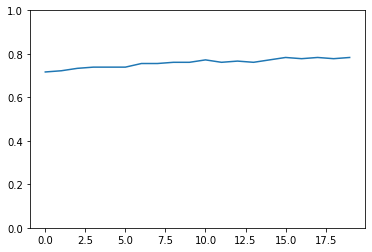

In [52]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.SGD(learning_rate=ft_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
hist2 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)

plt.ylim(0,1)
plt.plot(hist2.history['val_accuracy'])

model.evaluate(test_ds)


# Inception-ResNet-V2

In [53]:
base_model = keras.applications.InceptionResNetV2(input_shape=(img_height,img_width,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

219062272/219055592 [==============================] - 2s 0us/step


In [54]:
preprocess_input = keras.applications.inception_resnet_v2.preprocess_input
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ],name="Data_Augmentation"
)
global_average_layer = keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(num_classes,name="Prediction_Layer")

In [55]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

In [56]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=base_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
start = time()
hist1 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)
end = time()
print("Time",end-start)

Epoch 1/20
12/12 [==============================] - 38s 2s/step - loss: 2.5846 - accuracy: 0.1115 - val_loss: 1.7938 - val_accuracy: 0.4167
Epoch 2/20
12/12 [==============================] - 17s 1s/step - loss: 1.9283 - accuracy: 0.3142 - val_loss: 1.6375 - val_accuracy: 0.3833
Epoch 3/20
12/12 [==============================] - 17s 1s/step - loss: 1.7126 - accuracy: 0.3834 - val_loss: 1.4457 - val_accuracy: 0.4833
Epoch 4/20
12/12 [==============================] - 17s 1s/step - loss: 1.4956 - accuracy: 0.4691 - val_loss: 1.2873 - val_accuracy: 0.5278
Epoch 5/20
12/12 [==============================] - 16s 1s/step - loss: 1.3754 - accuracy: 0.5064 - val_loss: 1.1864 - val_accuracy: 0.5944
Epoch 6/20
12/12 [==============================] - 17s 1s/step - loss: 1.2888 - accuracy: 0.5373 - val_loss: 1.1628 - val_accuracy: 0.6000
Epoch 7/20
12/12 [==============================] - 17s 1s/step - loss: 1.2389 - accuracy: 0.5683 - val_loss: 1.1334 - val_accuracy: 0.5944
Epoch 8/20
12/12 [==

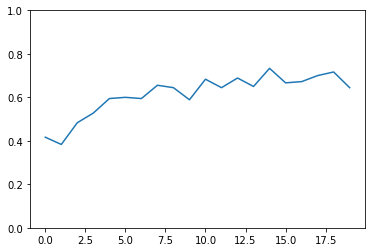

In [58]:
plt.ylim(0,1)
plt.plot(hist1.history['val_accuracy'])

In [59]:
os.chdir("/content/Mushroom")
start = time()
model.evaluate(test_ds)
end = time()
print("TIME",end-start)

2/2 [==============================] - 3s 2s/step - loss: 0.9851 - accuracy: 0.6500
TIME 3.3953864574432373


Epoch 1/20
12/12 [==============================] - 60s 3s/step - loss: 0.9202 - accuracy: 0.6642 - val_loss: 0.8225 - val_accuracy: 0.7111
Epoch 2/20
12/12 [==============================] - 36s 3s/step - loss: 0.8342 - accuracy: 0.7119 - val_loss: 0.7502 - val_accuracy: 0.7556
Epoch 3/20
12/12 [==============================] - 36s 3s/step - loss: 0.6792 - accuracy: 0.7594 - val_loss: 0.7450 - val_accuracy: 0.7333
Epoch 4/20
12/12 [==============================] - 37s 3s/step - loss: 0.6924 - accuracy: 0.7686 - val_loss: 0.7076 - val_accuracy: 0.7333
Epoch 5/20
12/12 [==============================] - 36s 3s/step - loss: 0.6559 - accuracy: 0.7532 - val_loss: 0.6867 - val_accuracy: 0.7444
Epoch 6/20
12/12 [==============================] - 36s 3s/step - loss: 0.5876 - accuracy: 0.8058 - val_loss: 0.6500 - val_accuracy: 0.7722
Epoch 7/20
12/12 [==============================] - 36s 3s/step - loss: 0.5405 - accuracy: 0.8068 - val_loss: 0.6491 - val_accuracy: 0.7444
Epoch 8/20
12/12 [==

[0.6498426198959351, 0.7699999809265137]

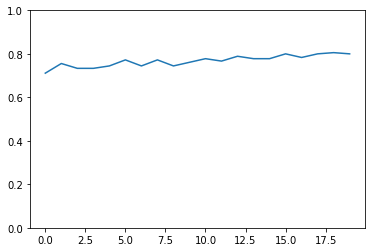

In [60]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.SGD(learning_rate=ft_learning_rate),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
hist2 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)

plt.ylim(0,1)
plt.plot(hist2.history['val_accuracy'])

model.evaluate(test_ds)


# Learning Rate/Optimization

In [61]:
plots = []
for lr in [0.001,0.01,0.1]:
  base_model = keras.applications.MobileNetV2(input_shape=(img_height,img_width,3),
                                                include_top=False,
                                                weights='imagenet')
  base_model.trainable = False
  preprocess_input = keras.applications.mobilenet_v2.preprocess_input
  data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                  input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ],name="Data_Augmentation"
  )
  global_average_layer = keras.layers.GlobalAveragePooling2D()
  prediction_layer = keras.layers.Dense(num_classes,name="Prediction_Layer")
  inputs = keras.Input(shape=(img_height, img_width, 3))
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = base_model(x, training=False)
  x = global_average_layer(x)
  x = keras.layers.Dropout(0.2)(x)
  outputs = prediction_layer(x)
  model = keras.Model(inputs, outputs)
  model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  start = time()
  hist1 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)
  end = time()
  print("Time",end-start)
  plots.append(hist1.history['val_accuracy'])

Epoch 1/20
12/12 [==============================] - 13s 489ms/step - loss: 2.7598 - accuracy: 0.0720 - val_loss: 2.4672 - val_accuracy: 0.1056
Epoch 2/20
12/12 [==============================] - 9s 418ms/step - loss: 2.6315 - accuracy: 0.0886 - val_loss: 2.4154 - val_accuracy: 0.1056
Epoch 3/20
12/12 [==============================] - 9s 409ms/step - loss: 2.4897 - accuracy: 0.1171 - val_loss: 2.3736 - val_accuracy: 0.1389
Epoch 4/20
12/12 [==============================] - 9s 411ms/step - loss: 2.4297 - accuracy: 0.1507 - val_loss: 2.3368 - val_accuracy: 0.1667
Epoch 5/20
12/12 [==============================] - 9s 412ms/step - loss: 2.4465 - accuracy: 0.1397 - val_loss: 2.3004 - val_accuracy: 0.1944
Epoch 6/20
12/12 [==============================] - 9s 412ms/step - loss: 2.3835 - accuracy: 0.1503 - val_loss: 2.2668 - val_accuracy: 0.1889
Epoch 7/20
12/12 [==============================] - 9s 410ms/step - loss: 2.3046 - accuracy: 0.1746 - val_loss: 2.2332 - val_accuracy: 0.2278
Epoch

Text(0.5, 1.0, 'Learning Rate')

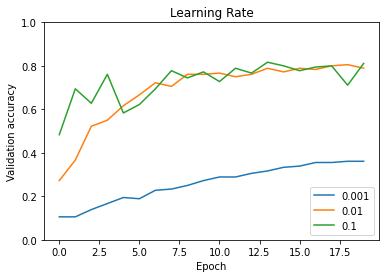

In [62]:
plt.figure(figsize=(6,4))
plt.ylim(0,1)
plt.xlabel("Epoch")
plt.ylabel("Validation accuracy")
plt.plot(plots[0])
plt.plot(plots[1])
plt.plot(plots[2])
plt.legend(["0.001","0.01","0.1"])
plt.title("Learning Rate")

In [63]:
optim = []

optim.append(keras.optimizers.SGD(learning_rate=base_learning_rate))
optim.append(keras.optimizers.Adam(learning_rate=base_learning_rate))
optim.append(keras.optimizers.RMSprop(learning_rate=base_learning_rate))
optim.append(keras.optimizers.Adadelta(learning_rate=base_learning_rate))
optim.append(keras.optimizers.Adagrad(learning_rate=base_learning_rate))
optim.append(keras.optimizers.Adamax(learning_rate=base_learning_rate))

plots = []
for op in optim:
  base_model = keras.applications.MobileNetV2(input_shape=(img_height,img_width,3),
                                                include_top=False,
                                                weights='imagenet')
  base_model.trainable = False
  preprocess_input = keras.applications.mobilenet_v2.preprocess_input
  data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                  input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ],name="Data_Augmentation"
  )
  global_average_layer = keras.layers.GlobalAveragePooling2D()
  prediction_layer = keras.layers.Dense(num_classes,name="Prediction_Layer")
  inputs = keras.Input(shape=(img_height, img_width, 3))
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = base_model(x, training=False)
  x = global_average_layer(x)
  x = keras.layers.Dropout(0.2)(x)
  outputs = prediction_layer(x)
  model = keras.Model(inputs, outputs)
  model.compile(optimizer=op,
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  start = time()
  hist1 = model.fit(train_ds,epochs=epochs,validation_data=val_ds)
  end = time()
  print("Time",end-start)
  plots.append(hist1.history['val_accuracy'])

Epoch 1/20
12/12 [==============================] - 13s 546ms/step - loss: 2.5457 - accuracy: 0.1201 - val_loss: 2.0452 - val_accuracy: 0.2944
Epoch 2/20
12/12 [==============================] - 9s 409ms/step - loss: 2.1242 - accuracy: 0.2733 - val_loss: 1.7541 - val_accuracy: 0.4167
Epoch 3/20
12/12 [==============================] - 9s 406ms/step - loss: 1.7938 - accuracy: 0.3764 - val_loss: 1.5614 - val_accuracy: 0.5222
Epoch 4/20
12/12 [==============================] - 9s 408ms/step - loss: 1.5846 - accuracy: 0.4777 - val_loss: 1.4049 - val_accuracy: 0.5722
Epoch 5/20
12/12 [==============================] - 9s 430ms/step - loss: 1.4611 - accuracy: 0.5098 - val_loss: 1.2898 - val_accuracy: 0.6444
Epoch 6/20
12/12 [==============================] - 9s 408ms/step - loss: 1.3371 - accuracy: 0.5750 - val_loss: 1.2088 - val_accuracy: 0.6278
Epoch 7/20
12/12 [==============================] - 9s 407ms/step - loss: 1.2121 - accuracy: 0.6137 - val_loss: 1.1325 - val_accuracy: 0.6500
Epoch

Text(0.5, 1.0, 'Optimizers')

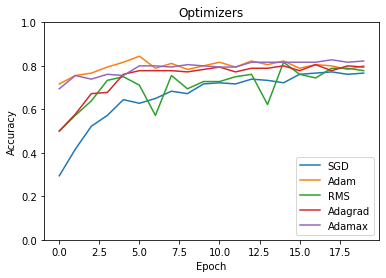

In [64]:
plt.figure(figsize=(6,4))
plt.ylim(0,1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(plots[0])
plt.plot(plots[1])
plt.plot(plots[2])
plt.plot(plots[4])
plt.plot(plots[5])
plt.legend(["SGD","Adam","RMS","Adagrad","Adamax"])
plt.title("Optimizers")

In [ ]:
plots[3]